In [9]:
import numpy as np
from patchmatch import PatchMatch
import cv2
from helper_functions import *
import mahotas
from copy import deepcopy

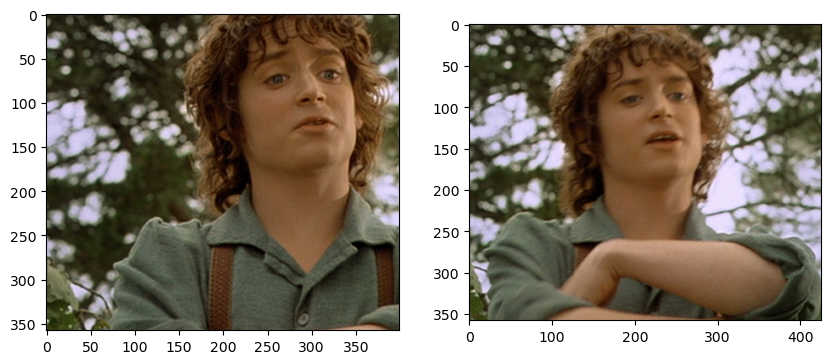

(358, 399, 3) (358, 426, 3)


In [22]:
pm = PatchMatch(2,3)
a = read_image("../images/a.png")
a_cpy = deepcopy(a)
b = read_image("../images/b.png")
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)
plot_images([a_cpy,b_cpy], (1,2))
print(a.shape, b.shape)

In [23]:
dist, loc = pm.run(a,b, True)

100%|██████████| 2/2 [01:00<00:00, 30.26s/it]


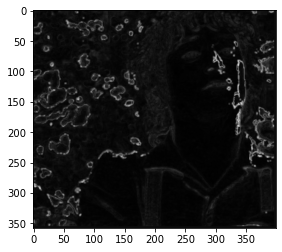

In [24]:
plt.imshow(dist, 'gray'); plt.show()

(358, 399, 3)


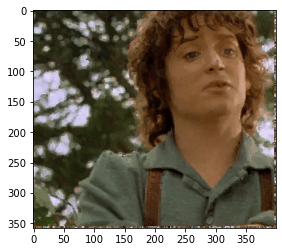

In [25]:
print(a.shape)
reconstructted_image = np.zeros(a_cpy.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = b_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

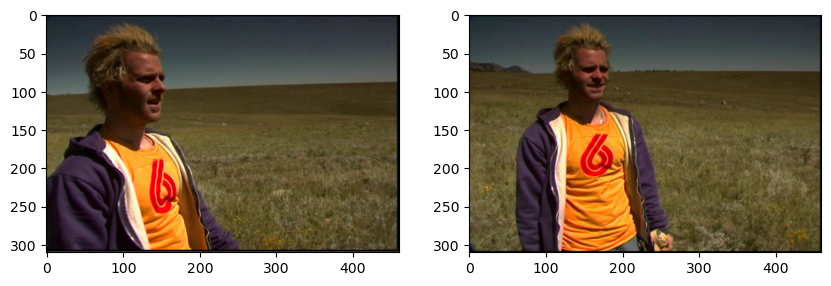

In [26]:
a = read_image("../images/test1a.png")
b = read_image("../images/test1b.png")
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [27]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:58<00:00, 29.16s/it]


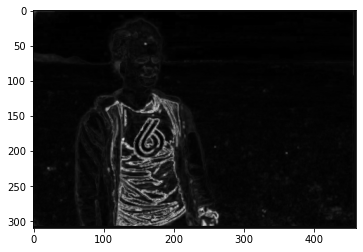

(310, 460, 3)


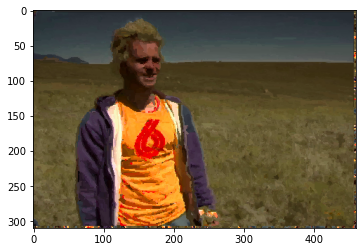

In [28]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

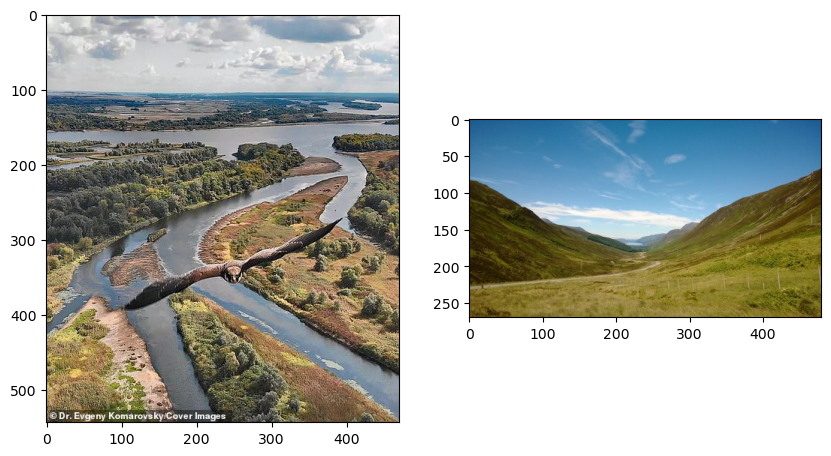

In [29]:
a = read_image("../images/test3a.jpg")
b = read_image("../images/test3b.jpg")
plot_images([a,b], (1,2))
a_cpy = deepcopy(a)
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)

In [30]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:53<00:00, 26.70s/it]


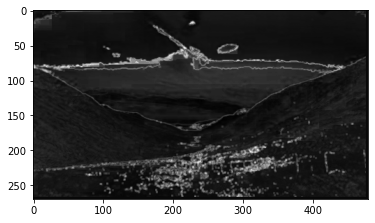

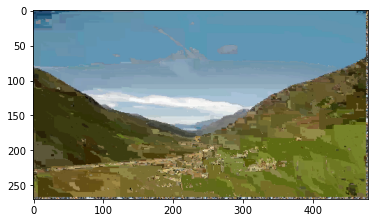

In [31]:
plt.imshow(dist, 'gray'); plt.show()
# print(a.shape)
reconstructted_image = np.zeros(b.shape)
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        reconstructted_image[i,j,1] = a_cpy[loc[i,j,0],loc[i,j,1],1]
        reconstructted_image[i,j,2] = a_cpy[loc[i,j,0],loc[i,j,1],2]
        reconstructted_image[i,j,0] = a_cpy[loc[i,j,0],loc[i,j,1],0]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()